In [161]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_drugs = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# print(mouse_drugs.head())
# print(clinical_trial_data.head())

mouse_clinical_trial = pd.merge(mouse_drugs, clinical_trial_data, on='Mouse ID', how='inner')
mouse_clinical_trial

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [201]:
mouse_clinical_reduced = mouse_clinical_trial[(mouse_clinical_trial['Drug'] == 'Capomulin') |
                                             (mouse_clinical_trial['Drug'] == 'Infubinol') | 
                                             (mouse_clinical_trial['Drug'] == 'Ketapril') |
                                             (mouse_clinical_trial['Drug'] == 'Placebo')]
mouse_clinical_reduced

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [202]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meantumor = mouse_clinical_reduced.groupby(['Drug','Timepoint'])
meantumor['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tumor_mean_df = pd.DataFrame(meantumor['Tumor Volume (mm3)'].mean())


# Preview DataFrame
tumor_mean_df.head(11)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Infubinol 0                   45.000000

In [203]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderrtumor = mouse_clinical_reduced.groupby(['Drug','Timepoint'])
stderrtumor['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
stderr_tumor_df = pd.DataFrame(stderrtumor['Tumor Volume (mm3)'].sem())

# Preview DataFrame
stderr_tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [258]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_t = tumor_mean_df.stack().unstack(level=0)
tumor_mean_t = tumor_mean_t.reset_index(level=1)
del tumor_mean_t['level_1']

stderr_t = stderr_tumor_df.stack().unstack(level=0)
stderr_t = stderr_t.reset_index(level=1)
del stderr_t['level_1']
# Preview that Reformatting worked
tumor_mean_t
stderr_t

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


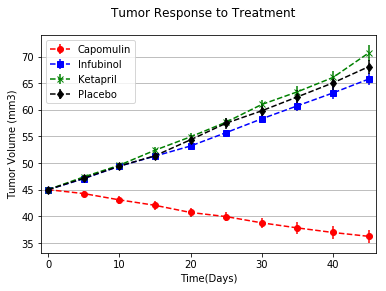

In [319]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
# print(stderr_t['Capomulin'])
x_axis = list(tumor_mean_t.index)
y_axis = [s for s in tumor_mean_t['Capomulin']]
stderr = [s for s in stderr_t['Capomulin']]

y_axis_inf = [s for s in tumor_mean_t['Infubinol']]
stderr_inf = [s for s in stderr_t['Infubinol']]

y_axis_ket = [s for s in tumor_mean_t['Ketapril']]
stderr_ket = [s for s in stderr_t['Ketapril']]

y_axis_pla = [s for s in tumor_mean_t['Placebo']]
stderr_pla = [s for s in stderr_t['Placebo']]

# print(stderr)
ax.errorbar(x_axis,y_axis,stderr,fmt='o',ls='--', color='r',label = 'Capomulin')
ax.errorbar(x_axis,y_axis_inf,stderr_inf,fmt='s',ls='--', color='b',label = 'Infubinol')
ax.errorbar(x_axis,y_axis_ket,stderr_ket,fmt='x',ls='--', color='g',label = 'Ketapril')
ax.errorbar(x_axis,y_axis_pla,stderr_pla,fmt='d',ls='--', color='black',label = 'Placebo')

ax.legend(loc='best')
ax.hlines(y=[35,40,45,50,55,60,65,70],xmin=-1,xmax=46,linewidth=1,alpha=0.25)


ax.set_xlim(-1, max(x_axis) + 1)

ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
fig.suptitle('Tumor Response to Treatment')
# Save the Figure
plt.savefig('Images/tumorresponse.png')
plt.show()

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [310]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metatumor = mouse_clinical_reduced.groupby(['Drug','Timepoint'])
metatumor['Metastatic Sites'].mean()

# Convert to DataFrame
meta_mean_df = pd.DataFrame(meantumor['Metastatic Sites'].mean())


# Preview DataFrame
meta_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [311]:
# Store the Standard Error associated with Metastatic Sites Grouped by Drug and Timepoint
stderrmeta = mouse_clinical_reduced.groupby(['Drug','Timepoint'])
stderrmeta['Metastatic Sites'].sem()

# Convert to DataFrame
stderr_meta = pd.DataFrame(stderrmeta['Metastatic Sites'].sem())

# Preview DataFrame
stderr_meta.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [314]:
# Minor Data Munging to Re-Format the Data Frames
tumor_meta_t = meta_mean_df.stack().unstack(level=0)
tumor_meta_t = tumor_meta_t.reset_index(level=1)
del tumor_meta_t['level_1']

stderr_meta_t = stderr_meta.stack().unstack(level=0)
stderr_meta_t = stderr_meta_t.reset_index(level=1)
del stderr_meta_t['level_1']
# Preview that Reformatting worked
print(tumor_meta_t)
stderr_meta_t

Drug       Capomulin  Infubinol  Ketapril   Placebo
Timepoint                                          
0           0.000000   0.000000  0.000000  0.000000
5           0.160000   0.280000  0.304348  0.375000
10          0.320000   0.666667  0.590909  0.833333
15          0.375000   0.904762  0.842105  1.250000
20          0.652174   1.050000  1.210526  1.526316
25          0.818182   1.277778  1.631579  1.941176
30          1.090909   1.588235  2.055556  2.266667
35          1.181818   1.666667  2.294118  2.642857
40          1.380952   2.100000  2.733333  3.166667
45          1.476190   2.111111  3.363636  3.272727


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


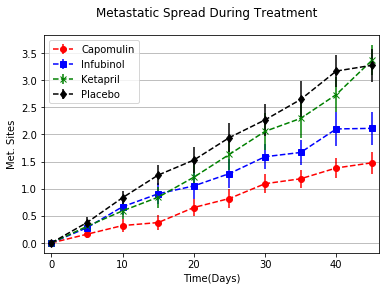

In [321]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
# print(stderr_t['Capomulin'])
x_axis = list(tumor_meta_t.index)
y_axis = [s for s in tumor_meta_t['Capomulin']]
stderr = [s for s in stderr_meta_t['Capomulin']]

y_axis_inf = [s for s in tumor_meta_t['Infubinol']]
stderr_inf = [s for s in stderr_meta_t['Infubinol']]

y_axis_ket = [s for s in tumor_meta_t['Ketapril']]
stderr_ket = [s for s in stderr_meta_t['Ketapril']]

y_axis_pla = [s for s in tumor_meta_t['Placebo']]
stderr_pla = [s for s in stderr_meta_t['Placebo']]

# print(stderr)
ax.errorbar(x_axis,y_axis,stderr,fmt='o',ls='--', color='r',label = 'Capomulin')
ax.errorbar(x_axis,y_axis_inf,stderr_inf,fmt='s',ls='--', color='b',label = 'Infubinol')
ax.errorbar(x_axis,y_axis_ket,stderr_ket,fmt='x',ls='--', color='g',label = 'Ketapril')
ax.errorbar(x_axis,y_axis_pla,stderr_pla,fmt='d',ls='--', color='black',label = 'Placebo')

ax.legend(loc='best')
ax.hlines(y=[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5],xmin=-1,xmax=46,linewidth=1,alpha=0.25)


ax.set_xlim(-1, max(x_axis) + 1)

ax.set_xlabel("Time(Days)")
ax.set_ylabel("Met. Sites")
fig.suptitle('Metastatic Spread During Treatment')
# Save the Figure
plt.savefig('Images/tumormeta.png')
plt.show()

## Survival Rates

In [323]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mousecount = mouse_clinical_reduced.groupby(['Drug','Timepoint'])
mousecount['Mouse ID'].count()

# Convert to DataFrame
mouse_count = pd.DataFrame(mousecount['Mouse ID'].count())


# Preview DataFrame
mouse_count.head(11)

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21
Infubinol 0                25

In [325]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_t = mouse_count.stack().unstack(level=0)
mouse_count_t = mouse_count_t.reset_index(level=1)
del mouse_count_t['level_1']

mouse_count_t.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


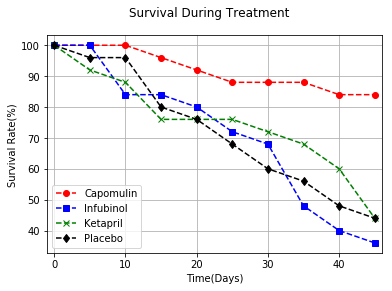

In [330]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()
# print(stderr_t['Capomulin'])
x_axis = list(mouse_count_t.index)
y_axis = [(s/25) * 100 for s in mouse_count_t['Capomulin']]

y_axis_inf = [(s/25) * 100 for s in mouse_count_t['Infubinol']]

y_axis_ket = [(s/25) * 100 for s in mouse_count_t['Ketapril']]

y_axis_pla = [(s/25) * 100 for s in mouse_count_t['Placebo']]

# print(stderr)
ax.grid()
ax.plot(x_axis,y_axis,marker='o',ls='--', color='r',label = 'Capomulin')
ax.plot(x_axis,y_axis_inf,marker='s',ls='--', color='b',label = 'Infubinol')
ax.plot(x_axis,y_axis_ket,marker='x',ls='--', color='g',label = 'Ketapril')
ax.plot(x_axis,y_axis_pla,marker='d',ls='--', color='black',label = 'Placebo')

ax.legend(loc='best')

ax.set_xlim(-1, max(x_axis) + 1)

ax.set_xlabel("Time(Days)")
ax.set_ylabel("Survival Rate(%)")
fig.suptitle('Survival During Treatment')
# Save the Figure
plt.savefig('Images/cancersurvival.png')
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)